
# Primates Morphology



 Using unsupervised machine learning methods to separate the groups belonging to different species.

The file primates-morphology.csv contains coordinates derived from markers of skull features from various species of primates. 
### Dataset: primates-morphology

## Imports

In [47]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.utils import shuffle
from sklearn.cluster import AgglomerativeClustering  
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np
import multiprocessing as mp 
import plotly.express as px


## Loading the data file

In [48]:
# Read the data file
df = pd.read_csv('primates-morphology.csv')
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,25,26,27,28,29,Abbreviation,Genus,Species,Sex,Age
0,37773,133.426742,-101.627603,21.125902,-11.518251,4.621089,-1.519551,0.583410,-7.182875,1.410030,...,-0.301822,-0.433051,0.037651,-0.279618,-0.421040,Ph,Presbytis,hosei,U,A
1,37772,145.344740,-108.229812,21.121390,-14.982879,2.299335,-2.354040,0.431199,-5.266930,-1.424469,...,0.215340,-0.299550,0.709472,0.876382,-0.150133,Ph,Presbytis,hosei,F,A
2,22276,137.773342,-107.162743,18.232497,-17.116294,3.016809,-5.295234,1.716895,-1.668914,-1.917478,...,-0.481468,-0.243025,-0.537644,-0.140292,0.082158,Pr,Presbytis,rubicunda,U,A
3,37776,141.523739,-107.436626,17.448083,-16.861469,3.382894,-1.071286,1.768891,-2.735232,-1.136700,...,0.586941,-0.043639,-0.518699,-1.051100,0.542354,Pr,Presbytis,rubicunda,M,A
4,37777,142.357906,-97.195294,10.511391,-6.520641,3.555506,1.652390,-0.655919,-5.373075,-1.466841,...,0.653851,0.718319,0.798722,-0.396749,0.844772,Pr,Presbytis,rubicunda,F,A


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 36 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    165 non-null    int64  
 1   0             165 non-null    float64
 2   1             165 non-null    float64
 3   2             165 non-null    float64
 4   3             165 non-null    float64
 5   4             165 non-null    float64
 6   5             165 non-null    float64
 7   6             165 non-null    float64
 8   7             165 non-null    float64
 9   8             165 non-null    float64
 10  9             165 non-null    float64
 11  10            165 non-null    float64
 12  11            165 non-null    float64
 13  12            165 non-null    float64
 14  13            165 non-null    float64
 15  14            165 non-null    float64
 16  15            165 non-null    float64
 17  16            165 non-null    float64
 18  17            165 non-null    

##### Getting an idea of the size of the data


In [50]:
df.shape

(165, 36)

##### Checking for null values

In [51]:

df.isnull().sum()

Unnamed: 0      0
0               0
1               0
2               0
3               0
4               0
5               0
6               0
7               0
8               0
9               0
10              0
11              0
12              0
13              0
14              0
15              0
16              0
17              0
18              0
19              0
20              0
21              0
22              0
23              0
24              0
25              0
26              0
27              0
28              0
29              0
Abbreviation    0
Genus           0
Species         0
Sex             0
Age             0
dtype: int64

There are no missing values.


##### Cleaning and modifying the data
##### As we need only the coordinates and the Species columns are important. We do not need the rest.

In [52]:

df= df.drop(['Unnamed: 0','Abbreviation','Genus','Sex','Age'],axis = 1)

In [53]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,Species
0,133.426742,-101.627603,21.125902,-11.518251,4.621089,-1.519551,0.583410,-7.182875,1.410030,0.216411,...,-0.406979,0.607499,-1.309488,1.555190,-0.301822,-0.433051,0.037651,-0.279618,-0.421040,hosei
1,145.344740,-108.229812,21.121390,-14.982879,2.299335,-2.354040,0.431199,-5.266930,-1.424469,-1.451953,...,-0.569739,0.669346,-0.805954,1.583042,0.215340,-0.299550,0.709472,0.876382,-0.150133,hosei
2,137.773342,-107.162743,18.232497,-17.116294,3.016809,-5.295234,1.716895,-1.668914,-1.917478,0.601120,...,1.715016,1.269193,-0.397373,-0.813108,-0.481468,-0.243025,-0.537644,-0.140292,0.082158,rubicunda
3,141.523739,-107.436626,17.448083,-16.861469,3.382894,-1.071286,1.768891,-2.735232,-1.136700,-2.706925,...,0.972070,-0.066568,0.001964,0.656327,0.586941,-0.043639,-0.518699,-1.051100,0.542354,rubicunda
4,142.357906,-97.195294,10.511391,-6.520641,3.555506,1.652390,-0.655919,-5.373075,-1.466841,-2.626544,...,-0.174675,0.368314,-0.700708,-0.450873,0.653851,0.718319,0.798722,-0.396749,0.844772,rubicunda


In [54]:
X = df.iloc[:,0:30]
y = df['Species']

##### Finding the unique elements of our array(spices)

In [55]:

len(y.unique())

25


In total, there are 25 different species. There is an obvious imbalance in the data. The metrics do not really struggle, so they are still fundamentally clustered.

In [56]:
df.dtypes

0          float64
1          float64
2          float64
3          float64
4          float64
5          float64
6          float64
7          float64
8          float64
9          float64
10         float64
11         float64
12         float64
13         float64
14         float64
15         float64
16         float64
17         float64
18         float64
19         float64
20         float64
21         float64
22         float64
23         float64
24         float64
25         float64
26         float64
27         float64
28         float64
29         float64
Species     object
dtype: object

#####  Now we want to Find the pairwise correlation of all columns in the dataframe. 

In [24]:
corr_mat = df.corr()

np.fill_diagonal(corr_mat.values, 0)
corr_mat

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.000000,-0.041708,0.028695,-0.076057,0.013712,0.052373,0.016908,-0.046053,-0.037217,0.046748,...,-0.028925,0.030022,0.024708,-0.024955,0.002520,0.019881,-0.018560,0.057024,-0.025943,0.032286
1,-0.041708,0.000000,0.043172,-0.019783,0.008371,0.008966,-0.003308,-0.008855,-0.021718,0.012890,...,-0.005368,0.017089,-0.014384,0.001424,-0.012147,-0.012350,-0.004888,0.020379,-0.024367,-0.007079
2,0.028695,0.043172,0.000000,0.070564,-0.002763,0.002871,0.008408,-0.008806,0.090029,-0.030186,...,0.034596,-0.044028,0.031256,0.005013,-0.011213,0.048836,-0.000353,-0.022921,0.053242,0.035857
3,-0.076057,-0.019783,0.070564,0.000000,0.013192,0.027493,0.019275,-0.051065,-0.094024,0.023952,...,-0.051799,0.019674,-0.005013,-0.018987,-0.025383,-0.059759,0.001855,0.003891,0.005615,0.030173
4,0.013712,0.008371,-0.002763,0.013192,0.000000,-0.004260,-0.007232,0.025959,-0.002687,0.011894,...,0.018083,-0.010714,0.020395,0.015030,0.009955,0.014735,-0.003238,0.000607,-0.011486,-0.002767
5,0.052373,0.008966,0.002871,0.027493,-0.004260,0.000000,-0.020004,0.020467,0.002156,-0.002816,...,0.005299,-0.036180,-0.020204,0.007033,0.002810,-0.013911,0.005370,-0.004989,-0.005221,-0.033779
6,0.016908,-0.003308,0.008408,0.019275,-0.007232,-0.020004,0.000000,0.023936,-0.005770,0.003889,...,0.012208,-0.035312,-0.010799,0.007769,0.003682,-0.009202,0.000428,0.009804,-0.018152,-0.022768
7,-0.046053,-0.008855,-0.008806,-0.051065,0.025959,0.020467,0.023936,0.000000,-0.005888,0.000203,...,-0.033876,0.027338,-0.008899,-0.020360,-0.031496,-0.017950,0.001465,-0.011085,0.030341,0.017377
8,-0.037217,-0.021718,0.090029,-0.094024,-0.002687,0.002156,-0.005770,-0.005888,0.000000,0.033454,...,-0.048191,-0.017236,-0.017815,0.003400,-0.005688,-0.058593,0.002620,0.015208,-0.009148,0.011517
9,0.046748,0.012890,-0.030186,0.023952,0.011894,-0.002816,0.003889,0.000203,0.033454,0.000000,...,0.009060,-0.002197,-0.021094,-0.014112,0.004557,-0.010829,0.010563,-0.011530,0.015543,0.012355


As we see there is no correlation between them .

Next I want to  check if there is correlation between features by heatmap

<AxesSubplot:>

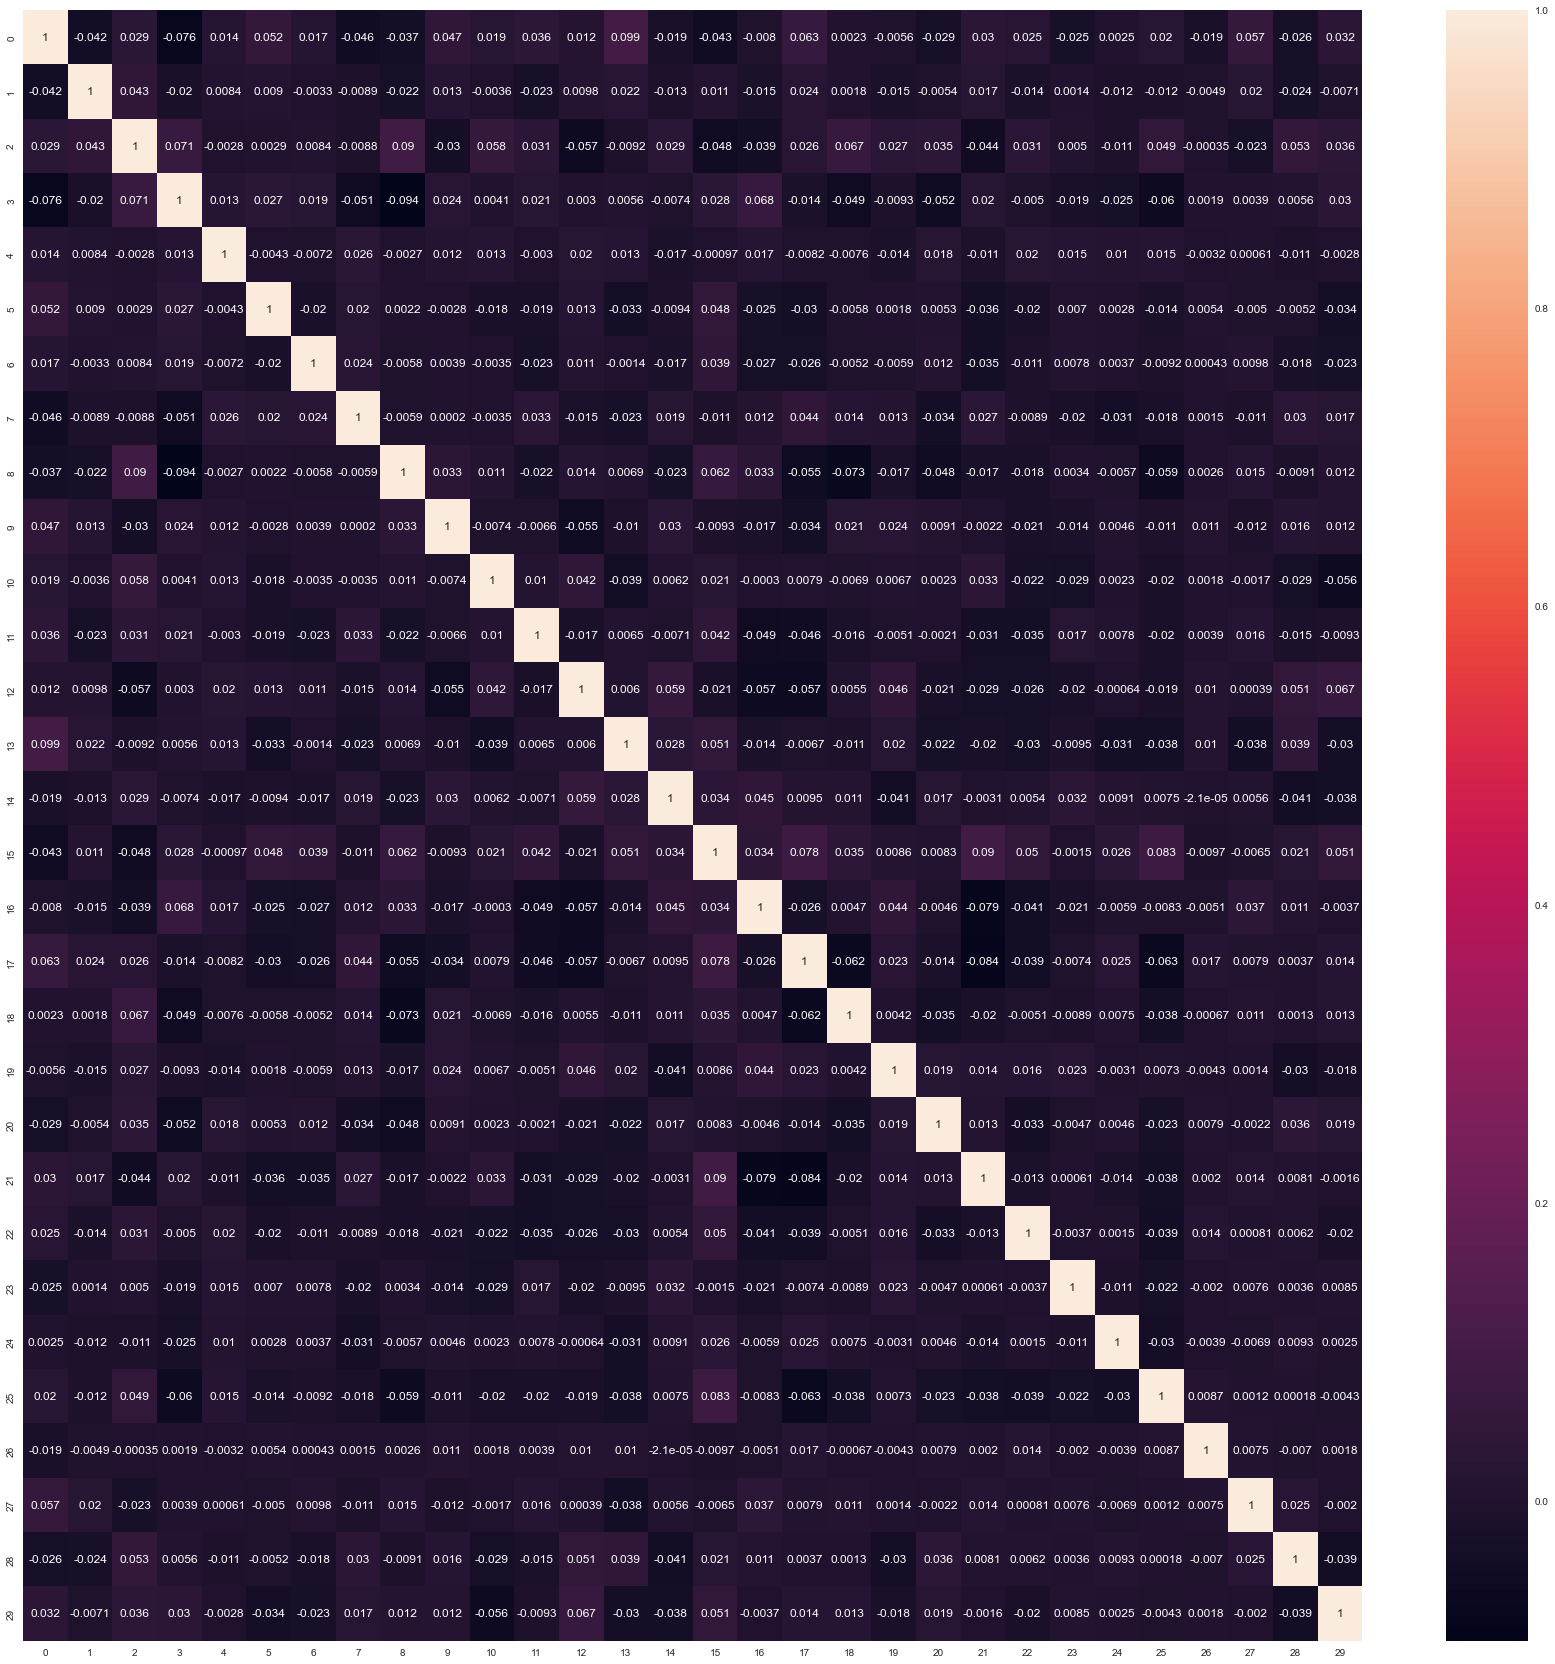

In [58]:

fig, ax = plt.subplots(figsize=(30,30))  
sns.heatmap(df.corr(),annot=True,ax=ax)

Based on above heatmap there is no correlation btween features then we should use all the features.

##### How much are they correlated? Can we eliminate certain features based on high correlations

In [59]:

corr_mat.abs().max()

0     0.098790
1     0.043172
2     0.090029
3     0.094024
4     0.025959
5     0.052373
6     0.039426
7     0.051065
8     0.094024
9     0.055370
10    0.058318
11    0.049083
12    0.066572
13    0.098790
14    0.058954
15    0.090092
16    0.079309
17    0.083696
18    0.072537
19    0.045678
20    0.051799
21    0.090092
22    0.050297
23    0.031552
24    0.031496
25    0.083279
26    0.018560
27    0.057024
28    0.053242
29    0.066572
dtype: float64

Pearson correlation measures the strength of a linear relationship between two variables. This value ranges from -1 to 1, with -1 indicating a total negative linear correlation, 0 indicating no correlation, and 1 indicating a total positive correlation.
As we can see here all the variebles shows  0 indicating which means there are no correlation.

In [60]:
# .skew 0: no skew, + right skew, - left skew, look for above .75 
skew_columns = (df
                .skew()
                .sort_values(ascending=False))

skew_columns = skew_columns.loc[skew_columns > 0.75]
skew_columns

C:\Users\Farimah\AppData\Local\Temp/ipykernel_20644/3718637905.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



4     2.358456
1     1.272854
14    1.267799
23    0.782396
dtype: float64

This is a coordinate space value and we dont have to do anything.

## Dimensionality reduction - PCA

we need to reduce the dimension of the dataset.
To do this, we use PCA. To plot and inspect the shape of data, the first two principal components are usually used. 
Also inspecting the next few principal components can provide insight into variance.
The variance explained by each component must be considered here as well.




In [61]:

from sklearn.decomposition import PCA
X = df.iloc[:,0:30]
pca = PCA()
principalComponents = pca.fit_transform(X)

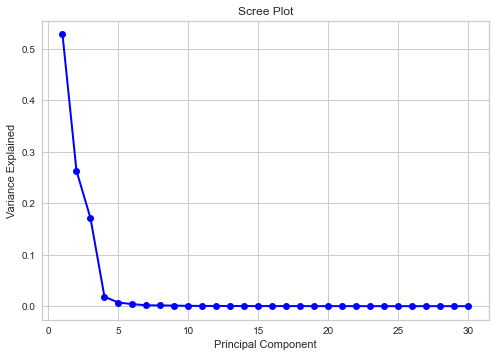

In [62]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

With this data, PCA is clearly not useful. These are not linearly separable.

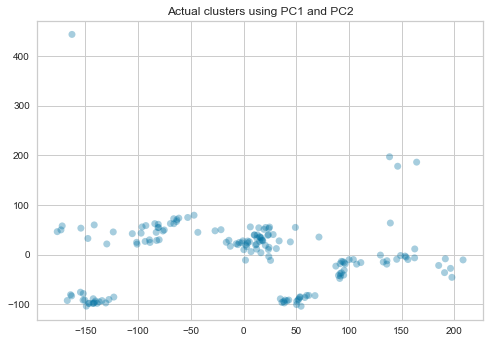

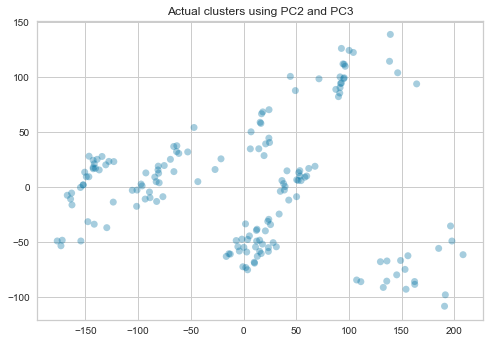

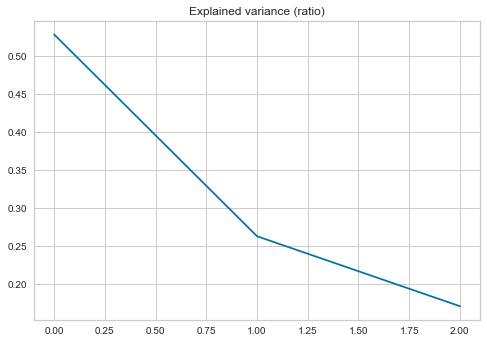

In [63]:

from sklearn.decomposition import PCA
X = df.iloc[:,0:30]

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2', 'pc3'])
principalDf.head()

plt.scatter(principalDf['pc1'], principalDf['pc2'], cmap = "jet", edgecolor = "None", alpha=0.35)
plt.title('Actual clusters using PC1 and PC2')
plt.show()


plt.scatter(principalDf['pc1'], principalDf['pc3'], cmap = "jet", edgecolor = "None", alpha=0.35)
plt.title('Actual clusters using PC2 and PC3')
plt.show()

plt.plot(range(0, 3), pca.explained_variance_ratio_)
plt.title('Explained variance (ratio)')
plt.show()


We can see that the explained variance drops quickly after the first three PCs. The clusters are not properly separated. Even though PCA reduced dimensionality, it can be difficult to visualize. 



Next,

Let's look at tSNE:

A method used to view high-dimensional data as a 2D projection. 

## tSNE

Now , we try tSNE on the dataset.
1. Run TSNE with default perplexity on the data set. Run tSNE several times. Does tSNE always give the same results when the parameters are held the same?
2. Vary the perplexity parameter and compare the results.
3. Color the plot by the diagnosis of each point. Pick a nice result to work with in the following exercises


##### Creating a 2D visualization to visualize the clusters

In [64]:
#Creating a 2D visualization to visualize the clusters
from sklearn.manifold import TSNE
tsne = TSNE(verbose=1, perplexity=5, n_iter= 3000)
Y = tsne.fit_transform(X)


C:\Users\Farimah\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\Farimah\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 165 samples in 0.001s...
[t-SNE] Computed neighbors for 165 samples in 0.142s...
[t-SNE] Computed conditional probabilities for sample 165 / 165
[t-SNE] Mean sigma: 11.703381
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.285706
[t-SNE] KL divergence after 3000 iterations: 0.211376


In [65]:
fig = px.scatter( x=Y[:,0], y=Y[:,1] , color=df['Species'], title='tSNE colored by actual clusters')
fig.show()

Based on tSNE result , species has been clustred in 8 groups. However multiple species are in the same cluster. So it's hard to separate them.

##### For finding out K-means n_clusters at first we visulise our data with elbow plot

C:\Users\Farimah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\Farimah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\Farimah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\Farimah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chun

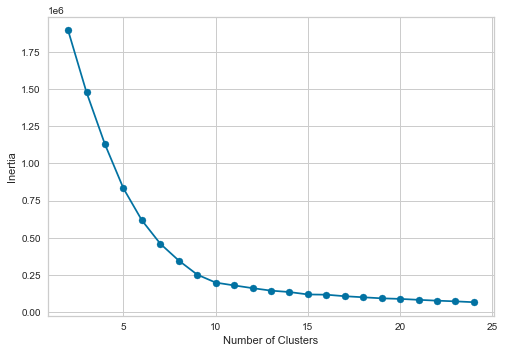

In [66]:

inertia = []
list_num_clusters = list(range(2,25))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(X)
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

It is necessary to select the value of k at the "elbow", which is the point at which the distortion or inertia starts decreasing linearly. Therefore, we conclude that the optimal number of clusters for the given data is 9.
well there is no real elbow shape as we see and we know there is 25 spicies and the goal is to seprate the spicies so we use n_clusters=25. if the the goal wasnt seprate the spicies we could use Silhouette score evaluate the quality of clusters created using.

## K-means clustering
In K-means clustering, groups that have not been explicitly labeled in the data are found. We can use the assumptions about what types of groups exist or identify unknown groups in complex data sets.
I choose to use K-means to calculate the normal distribution in this dataset and find the best one, even though I know this method requires spherical shapes and the method is unlikely to work. In the case of KMeans, it may be possible to separate species by splitting a cluster in two.



##### Cluster using k-means

##### K-means on original data

In [67]:

from sklearn.cluster import KMeans
kmns = KMeans(n_clusters=25, init='k-means++')
kY = kmns.fit_predict(X)
# K-means on tSNE results
kmns = KMeans(n_clusters=25, init='k-means++')
kY = kmns.fit_predict(Y)

fig = px.scatter( x=Y[:,0], y=Y[:,1] , color=kY, title='K-means predicted')
fig.show()

fig = px.scatter( x=Y[:,0], y=Y[:,1] , color=df['Species'], title='True')
fig.show()

C:\Users\Farimah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\Farimah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



As we see the data is so difficult to seprate the spcies because the coordinates do not explain the clusters enough.
The results aren't great, as expected. Many species get misclassified, including the badius and rubicunda.
there is no requirement to predetermine the number of clusters as we did in the K-Means algorithm.


In [68]:
# ARI
from sklearn import metrics
from sklearn import cluster


kmns = KMeans(n_clusters=25, init='k-means++')
kY = kmns.fit_predict(X)

metrics.adjusted_rand_score(y,kY)


C:\Users\Farimah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



0.49935596483740263

The Rand Index measures similarity between two clusterings by counting the number of samples assigned to the same or different clusters in predicted and true clusterings.
The adjusted Rand index is thus ensured to have a value close to 0.0 for random labeling independently of the number of clusters and samples and exactly 1.0 when the clusterings are identical.
As we can see the result of adjusted_rand index  is 0 which means random the cluster is randomly pointing sth which is not good , the best result is when is 1 it can recinstract the cluster .

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html

### Hierarchical clustering

In the last step I performed hierarchical clustering analysis (HAC)
I used AgglomerativeClustering to perform (HAC)
Agglomerative is a bottom-up approach, in which the algorithm starts with taking all data points as single clusters and merging them until one cluster is left.
With this algorithm, we build a tree-shaped structure that represents the hierarchy of clusters.
There may be some similarities in the results of K-means clustering and hierarchical clustering, but they differ depending on how they are applied. In contrast to K-Means, there is no need to predetermine the number of clusters.
There are some challenges with this algorithm, as we saw with the K-means clustering, such as a predetermined number of clusters, and the algorithm attempts to create a cluster of the same size all the time.
In order to solve these two challenges (Agglomerative is a bottom-up approach, and Divisive is a top-down approach) we can use hierarchical clustering.


We use the "ward" linkage, which defines the linkage criteria. For creating the Dendrogram,It reduces the variance among clusters.

https://www.javatpoint.com/hierarchical-clustering-in-machine-learning

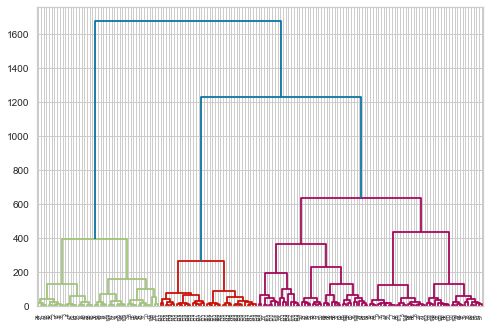

In [69]:
from sklearn.cluster import AgglomerativeClustering
# either set number of clusters or distance metric
ag = AgglomerativeClustering(n_clusters=25, linkage='ward', 
compute_full_tree=True)
ag = ag.fit(X)
labels = ag.labels_
y = ag.fit_predict(X)
from scipy.cluster import hierarchy
Z = hierarchy.linkage(ag.children_, method='ward')
den = hierarchy.dendrogram(Z)

As we see in this Dendrogram, we will now determine the optimal number of clusters for our model. For this, we will find the maximum vertical distance that does not cut any horizontal bar. Consider the above diagram , the optimal number of clusters will be 3 clusters. But I cant cluster species

In [70]:
fig = px.scatter( x=Y[:,0], y=Y[:,1] , color=labels)
fig.show()

As we see we have separate clusters here. Agglomerative Clustering predicts several clusters. In the plot above we see that there are several groups. However, if we compare that with the actual clusters of species in the figure belowm we see that the species are not clearly separable. 

In [46]:
fig = px.scatter( x=Y[:,0], y=Y[:,1] , color=df['Species'])
fig.show()

### Conclusion
The goal was to create a model to separate the species from each other using unsupervised learning. I used K-means and hierarchical clustering to look for clusters and be able to separate the species. However, it turned out that it was very hard to cluster the species. The coordinate data is not sufficient enough to describe the difference between the species.

A future direction could be:
- including gene expression data to separate species.
- create a unsupervised model that only predicts a subset of the species.